In [26]:
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras import backend as k
import matplotlib.pyplot as plt
%matplotlib inline

img_rows, img_cols = 28,28

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

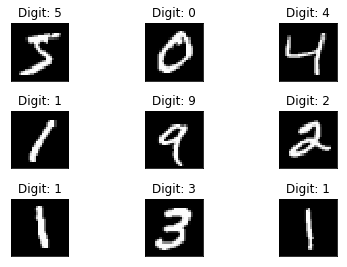

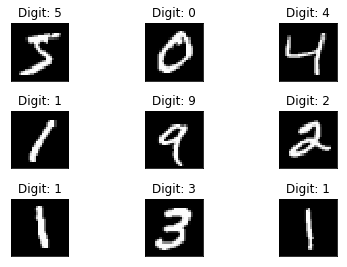

In [4]:
# show first 10 data
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
fig

In [13]:
# Reshaping data
print('x_train shape:', x_train.shape)
if k.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols,1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)

x_train shape: (60000, 28, 28)
x_train shape: (60000, 28, 28, 1)


In [14]:
# change label to categorial formats
import keras
num_category = 10
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)

In [28]:
# model building
model = Sequential()

# convolutional layer with rectified linear unit activation
# 32 convolution filters used in each of size 3x3
model.add(Conv2D(32, kernel_size=(3,3),
                activation='relu',
                input_shape=input_shape))
# 64 convolution filters used in each of size 3x3
model.add(Conv2D(64, (3,3), activation='relu'))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_category, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [30]:
batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 859s 14ms/step - loss: 0.2866 - acc: 0.9114 - val_loss: 0.0738 - val_acc: 0.9756
Epoch 2/10
60000/60000 [==============================] - 920s 15ms/step - loss: 0.0997 - acc: 0.9703 - val_loss: 0.0416 - val_acc: 0.9854
Epoch 3/10
60000/60000 [==============================] - 979s 16ms/step - loss: 0.0780 - acc: 0.9773 - val_loss: 0.0450 - val_acc: 0.9857
Epoch 4/10
60000/60000 [==============================] - 987s 16ms/step - loss: 0.0658 - acc: 0.9805 - val_loss: 0.0345 - val_acc: 0.9889
Epoch 5/10
60000/60000 [==============================] - 1060s 18ms/step - loss: 0.0584 - acc: 0.9823 - val_loss: 0.0290 - val_acc: 0.9906
Epoch 6/10
60000/60000 [==============================] - 1130s 19ms/step - loss: 0.0496 - acc: 0.9851 - val_loss: 0.0360 - val_acc: 0.9891
Epoch 7/10
60000/60000 [==============================] - 900s 15m

In [31]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.029339951181963853
Test accuracy: 0.9915


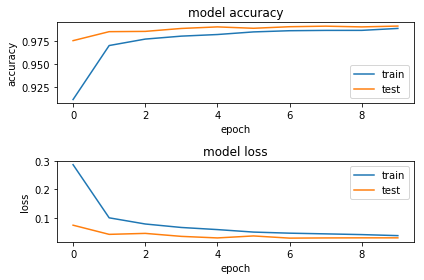

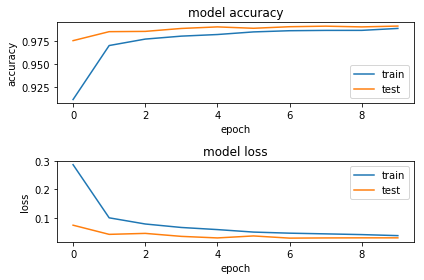

In [32]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig

In [33]:
#Save the model
# serialize model to JSON
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
    json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("model_digit.h5")
print("Saved model to disk")

Saved model to disk
